In [2]:
#To import data and perform data wrangling on it

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
titanic = pd.read_csv("Titanic-Dataset.csv")

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [5]:
#creating separate encoder for each column

sex_encoder=LabelEncoder()
embarked_encoder=LabelEncoder()

In [8]:
#filling missing values  before encoding

titanic["Sex"]=sex_encoder.fit_transform (titanic["Sex"])

titanic["Embarked"]=titanic["Embarked"].fillna("unknown")
titanic["Embarked"]=embarked_encoder.fit_transform(titanic["Embarked"])

In [9]:
#removing duplicates

titanic_cleaned = titanic.drop_duplicates()
titanic_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


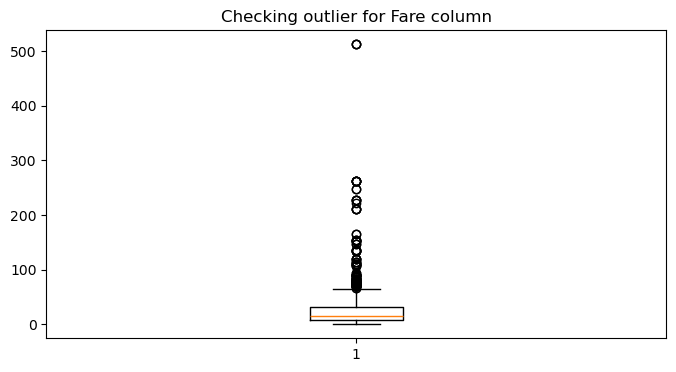

In [12]:
#checking outliers
#checking and plotting outliers for fare column

plt.figure(figsize = (8,4))
plt.boxplot(titanic_cleaned['Fare'])
plt.title('Checking outlier for Fare column')
plt.show()

In [14]:
#capping the outlier in fare to 99 percentile

fare_cap = titanic_cleaned['Fare'].quantile(0.99)
titanic_cleaned['Fare']=np.where(titanic_cleaned['Fare']>fare_cap, fare_cap, titanic_cleaned['Fare'])

In [15]:
#printing summary of fare column post outlier capping

print(titanic['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [17]:
#normalizing numerical data

scaler=StandardScaler()
titanic_cleaned[['Age','Fare']]=scaler.fit_transform (titanic_cleaned[['Age','Fare']])

In [19]:
print(titanic_cleaned.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.530377      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.571831      1   
2                             Heikkinen, Miss. Laina    0 -0.254825      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.365167      1   
4                           Allen, Mr. William Henry    1  0.365167      0   

   Parch            Ticket      Fare Cabin  Embarked  
0      0         A/5 21171 -0.564109   NaN         2  
1      0          PC 17599  0.942548   C85         0  
2      0  STON/O2. 3101282 -0.548227   NaN         2  
3      0            113803  0.514708  C123         2  
4      0            373450 -0.545285   

In [23]:
#saving cleaned data to csv file

titanic_cleaned.to_csv("cleaned_data.txt", index = False)
print("Cleaned data is saved to csv file successfully")

Cleaned data is saved to csv file successfully
